# Exploratory Data Analysis for Greater London Authority

## What are the demographics of cyclists?

### Import Libraries 

In [ ]:
#Import the basic libraries
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date

#Import the basic visualisations
import seaborn as sns
import matplotlib.pyplot as plt

### Import DataSets 

In [ ]:
#Load the dataset
Central_London = pd.read_csv("Central London.csv")
Inner_London = pd.read_csv("Inner London.csv")
Outer_London = pd.read_csv("Outer London.csv")

### Data Exploration

In [3]:
# How can I deliminate the data
# Understanding the shape and nature of the data
Central_London.head(2)

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0,NaN,NaN,NaN


In [44]:
Central_London.dtypes

Survey wave (calendar quarter)     object
Equivalent financial quarter       object
Site ID                            object
Location                           object
Survey date                        object
Weather                            object
Time                               object
Period                             object
Direction                          object
Start hour                        float64
Start minute                      float64
Number of private cycles          float64
Number of cycle hire bikes        float64
Total cycles                      float64
Unnamed: 14                       float64
Unnamed: 15                       float64
Unnamed: 16                       float64
dtype: object

In [4]:
# Understanding the shape and nature of the data
Inner_London.head(2)

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1.0,0.0,1.0
1,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2.0,0.0,2.0


In [5]:
# Understanding the shape and nature of the data
Outer_London.head(2)

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
0,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3
1,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3


### What is the sentiment towards cycling in London?

In [6]:
# copy the YAML file and your Twitter keys over before you start to work
!pip install pyyaml
import yaml
from yaml.loader import SafeLoader
from twitter import *

# Import the yaml file - remember to specify the whole path and use / between directories
twitter_creds = yaml.safe_load(open('C://Users//Akira//Desktop//LSE//Python//twitter.yaml', 'r').read())

# pass your twitter credentials
twitter_api = Twitter(auth=OAuth(twitter_creds['access_token'],
                                 twitter_creds['access_token_secret'], 
                                 twitter_creds['api_key'],
                                 twitter_creds['api_secret_key'] ))

In [7]:
print(twitter_api)

# Run  a test

In [8]:
# Run a test with #cycling
cycling_tweets = twitter_api.search.tweets(q="#cycling")

# View output
print(cycling_tweets)

{'statuses': [{'created_at': 'Thu Aug 11 15:32:36 +0000 2022', 'id': 1557751847770898433, 'id_str': '1557751847770898433', 'text': 'Vittoria Targets Less Weight and Speed with New "Ultra Light Speed" Inner Tube @VittoriaTires #VittoriaTires… https://t.co/0onN3QqvZQ', 'truncated': True, 'entities': {'hashtags': [{'text': 'VittoriaTires', 'indices': [94, 108]}], 'symbols': [], 'user_mentions': [{'screen_name': 'VittoriaTires', 'name': 'Vittoria', 'id': 142718414, 'id_str': '142718414', 'indices': [79, 93]}], 'urls': [{'url': 'https://t.co/0onN3QqvZQ', 'expanded_url': 'https://twitter.com/i/web/status/1557751847770898433', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [110, 133]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://publicize.wp.com/" rel="nofollow">WordPress.com</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name'

In [9]:
#Query the term 'cycling'
q = {'q': 'cycling', 'count':100, 'result_type':'recent'}

#Set results to an empty list
results = []

#Use a while loop and specify condition as len(results) < 30:
while len(results)<30:
    query=twitter_api.search.tweets(**q)
    q['max_id'] = query['search_metadata']['next_results'].split('&')[0].split('?max_id=')[1]
    results.append(query)
    
#Determine length of results
len(results)

30

In [10]:
cycling_list_pd = pd.concat([pd.DataFrame(_['statuses']) for _ in results])

# View shape of output
cycling_list_pd.shape

(3000, 30)

In [11]:
cycling_list_pd.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweet_count,favorite_count,favorited,retweeted,lang,quoted_status_id,quoted_status_id_str,possibly_sensitive,quoted_status,extended_entities
0,Thu Aug 11 15:33:41 +0000 2022,1557752119171526657,1557752119171526657,RT @Mamethebirb: [ลดน้ำหนัก] โยโย่ คืออะไร เกิ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'th', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,4250,0,False,False,th,NaN,NaN,NaN,NaN,NaN
1,Thu Aug 11 15:33:37 +0000 2022,1557752100918071302,1557752100918071302,Climate Action Preston’s cycling project launc...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.557752e+18,1557751942721552386,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Thu Aug 11 15:33:34 +0000 2022,1557752091245916161,1557752091245916161,"Cycling or biking in Kansas, instead of guzzli...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://cheapbotsdonequick.com"" rel=""...",NaN,None,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Thu Aug 11 15:33:30 +0000 2022,1557752074703900672,1557752074703900672,RT @Mamethebirb: [ลดน้ำหนัก] โยโย่ คืออะไร เกิ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'th', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,4250,0,False,False,th,NaN,NaN,NaN,NaN,NaN
4,Thu Aug 11 15:33:11 +0000 2022,1557751991794810880,1557751991794810880,RT @travelmail: Glamping with grandparents? Ch...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://www.make.com"" rel=""nofollow"">...",NaN,None,...,2,0,False,False,en,NaN,NaN,NaN,NaN,NaN


In [12]:
#Exploring extracted twitter data
cycling_list_pd.dtypes

created_at                    object
id                             int64
id_str                        object
text                          object
truncated                       bool
entities                      object
metadata                      object
source                        object
in_reply_to_status_id        float64
in_reply_to_status_id_str     object
in_reply_to_user_id          float64
in_reply_to_user_id_str       object
in_reply_to_screen_name       object
user                          object
geo                           object
coordinates                   object
place                         object
contributors                  object
retweeted_status              object
is_quote_status                 bool
retweet_count                  int64
favorite_count                 int64
favorited                       bool
retweeted                       bool
lang                          object
quoted_status_id             float64
quoted_status_id_str          object
p

In [13]:
#Converting column from object to text
cycling_list_values = cycling_list_pd['text'].values

In [14]:
#Visualise tweet example
cycling_list_values[2]

"Cycling or biking in Kansas, instead of guzzling gas in a car, will immensely lessen emissions, let's get better to… https://t.co/BlTbxXfTo3"

# DETERMINING TRENDING TWITTER TOPICS IN LONDON

In [17]:
# determine worldwide trends
trends_worldwide = twitter_api.trends.available()

# how many trends available
print(len(trends_worldwide))

# example of trends_worldwide
trends_worldwide[0]

467


{'name': 'Worldwide',
 'placeType': {'code': 19, 'name': 'Supername'},
 'url': 'http://where.yahooapis.com/v1/place/1',
 'parentid': 0,
 'country': '',
 'woeid': 1,
 'countryCode': None}

In [18]:
# write a twitter request
list_of_names = [_['name'] for _ in trends_worldwide]

# list of first 10
list_of_names[0:10]

['Worldwide',
 'Winnipeg',
 'Ottawa',
 'Quebec',
 'Montreal',
 'Toronto',
 'Edmonton',
 'Calgary',
 'Vancouver',
 'Birmingham']

In [19]:
# find Melbourne
our_city = 'London'

# create variable
list_of_names_our_city = [_ for _ in trends_worldwide if _['name'] == our_city]

# view output
print(len(list_of_names_our_city))

# use index to find Melbourne
list_of_names_our_city[0]

1


{'name': 'London',
 'placeType': {'code': 7, 'name': 'Town'},
 'url': 'http://where.yahooapis.com/v1/place/44418',
 'parentid': 23424975,
 'country': 'United Kingdom',
 'woeid': 44418,
 'countryCode': 'GB'}

In [20]:
# list of where on earth identifies (woeid)
list_of_names_our_city[0]['woeid']

44418

In [37]:
# look at trends in Melbourne
london_trends = twitter_api.trends.place(_id = list_of_names_our_city[0]['woeid'])

# view output
london_trends

[{'trends': [{'name': '#AONArsenal',
    'url': 'http://twitter.com/search?q=%23AONArsenal',
    'promoted_content': None,
    'query': '%23AONArsenal',
    'tweet_volume': None},
   {'name': '#wato',
    'url': 'http://twitter.com/search?q=%23wato',
    'promoted_content': None,
    'query': '%23wato',
    'tweet_volume': None},
   {'name': '#energybills',
    'url': 'http://twitter.com/search?q=%23energybills',
    'promoted_content': None,
    'query': '%23energybills',
    'tweet_volume': None},
   {'name': 'Joshua',
    'url': 'http://twitter.com/search?q=Joshua',
    'promoted_content': None,
    'query': 'Joshua',
    'tweet_volume': 89726},
   {'name': '#DentistFilmsOrSongs',
    'url': 'http://twitter.com/search?q=%23DentistFilmsOrSongs',
    'promoted_content': None,
    'query': '%23DentistFilmsOrSongs',
    'tweet_volume': None},
   {'name': 'JEON JUNGKOOK',
    'url': 'http://twitter.com/search?q=%22JEON+JUNGKOOK%22',
    'promoted_content': None,
    'query': '%22JEON+JUN

In [39]:
#CREATE A DATAFRAME FOR LONDON CITY TRENDS
# create DataFrame
london_trends_pd = pd.DataFrame(our_city_trends[0]['trends'])

# view DataFrame
london_trends_pd

,name,url,promoted_content,query,tweet_volume
0,#AONArsenal,http://twitter.com/search?q=%23AONArsenal,None,%23AONArsenal,NaN
1,#wato,http://twitter.com/search?q=%23wato,None,%23wato,NaN
2,#energybills,http://twitter.com/search?q=%23energybills,None,%23energybills,NaN
3,#NFTiff,http://twitter.com/search?q=%23NFTiff,None,%23NFTiff,15774.0
4,Joshua,http://twitter.com/search?q=Joshua,None,Joshua,89369.0
5,Jeremy Kyle,http://twitter.com/search?q=%22Jeremy+Kyle%22,None,%22Jeremy+Kyle%22,NaN
6,Bowie,http://twitter.com/search?q=Bowie,None,Bowie,NaN
7,Urged,http://twitter.com/search?q=Urged,None,Urged,11171.0
8,Buatsi,http://twitter.com/search?q=Buatsi,None,Buatsi,NaN
9,Tommy Lee,http://twitter.com/search?q=%22Tommy+Lee%22,None,%22Tommy+Lee%22,NaN


In [40]:
london_trends_lists = [trend['name'] for trend in london_trends[0]['trends']]

#view output
print(london_trends_lists)

['#AONArsenal', '#wato', '#energybills', 'Joshua', '#DentistFilmsOrSongs', 'JEON JUNGKOOK', '#heatwave', 'Rage Against The Machine', 'Urged', 'RATM', 'Tommy Lee', 'Buatsi', 'Kofi', 'Nuala', 'Tavistock', 'Andrew Tate', 'Modric', 'Martin Lewis', 'Harvey Elliott', 'Tower of Fantasy', 'Pascal', 'MAPs', 'Vogue', 'Dan Hodges', 'Britney', 'Eddie Izzard', 'Willian', 'Eventbrite', 'Kevin Federline', 'mermaids', 'Ryanair', 'Mark Spencer', 'Eddie Mair', 'alex salmond', 'Ramos', '#thursdayvibes', '#ShowUsYouKnowUs', '#KeirStarmerInFiveWords', '#CorbynWasRight', '#anywherecard', '#ClimateScam', '#REVB', '#RHOBH', '#ThursdayThoughts', '#aplaceinthesun', '#CheltLitFest', '#RakshaBandhan', '#FIFA23', '#hiring', '#Somaliland']


# Perform Sentiment Analysis on Tweets

In [28]:
#import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#create a variable to store SIA
cycle_london = SentimentIntensityAnalyzer()

In [29]:
#Run dict comprehension 
cycling_list_values_token_nostop_polarity =\
{" ".join(_) : cycle_london.polarity_scores(" ".join(_)) for _ in cycling_list_values_token}

In [30]:
#Create a polarity DataFrame
polarity_pd = pd.DataFrame(cycling_list_values_token_nostop_polarity).T

In [31]:
#Top 20 most positive cycling tweets
polarity_pd.sort_values('pos', ascending=0).head(20)

,neg,neu,pos,compound
Out cycling listening to @ thevaughnsnj & gt ; & gt ; & gt ; & gt ; & gt ; & gt ; & gt ; ( apart from dying from the heat ) https : //t.co/CrOwTe6O3u,0.0,0.469,0.531,0.8934
"@ cyclist_andyc Well done to all of you , compliments on your courage and determination . Excellent article in Cyclin… https : //t.co/I6A29wHWrr",0.0,0.493,0.507,0.9246
"RT @ WeRideAustralia : Fiona Campbell won a 2019 Cycling Luminaries Award . Responsible for driving Sydney ’ s cycling vision for an active , hea…",0.0,0.496,0.504,0.9217
@ ljhamilton88 Yes ! What a great way to spend the day 😊,0.0,0.497,0.503,0.7959
# ADCC is very proud to share this great achievement and hope our players are having an amazing time ! Let ’ s take a… https : //t.co/uYfuyv79kq,0.0,0.504,0.496,0.9567
# ADCC is very proud to share this great achievement and hope our players are having an amazing time ! Let ’ s take a… https : //t.co/xTyMH9MNCq,0.0,0.504,0.496,0.9567
"Simple pleasures ; brilliant company , great weather and the joy of cycling in # Cairngorms ... a place of stunningly… https : //t.co/7jQBZZaVSl",0.0,0.507,0.493,0.9393
New # cycling top . Olympique Marseille supporters Africa edition . Nice and bright to be seen . Safety first . # TeamOM… https : //t.co/DbbH37AxT6,0.0,0.515,0.485,0.9042
@ ExoHoranghae going cycling with jeonghan & amp ; DK too . wow to be boo seungkwan best friend 🥹,0.0,0.517,0.483,0.9042
"@ feastsandfables @ WinningSolo Inching closer to a cycling holiday , so that will help clear them !",0.0,0.539,0.461,0.8203


In [32]:
#Top 20 most negative cycling tweets
polarity_pd.sort_values('neg', ascending=0).head(20)

,neg,neu,pos,compound
Todays Ridiculous Anti- or more appropriately Stupid- Cycling Comment : https : //t.co/NualUBXZIo,0.515,0.485,0.000,-0.8166
Michele Gazzoli receives one-year ban for Anti-Doping violation https : //t.co/QssIxTLGIT,0.459,0.541,0.000,-0.7783
"@ AshCh1888 @ comcab33 You 're very aggressive my friend , threatening cyclist 's with physical violence and poor langua… https : //t.co/vTMYtMl4qT",0.417,0.467,0.116,-0.8414
cycling with broken glasses in a highway i love danger,0.414,0.318,0.268,-0.3182
i fucking hate cycling i am sweating SO MUCH,0.400,0.600,0.000,-0.6115
"@ phil_b @ gnomeicide @ cycling_dave I block people for being rude , racist bigots etc , however not for expressing a d… https : //t.co/5nkRLBtABr",0.398,0.602,0.000,-0.8720
@ writebikerepeat America Fuck Yeah Cycling ( I am not proud of this ),0.397,0.459,0.144,-0.5932
"@ anewcd Die Standartrunde die ich immer noch fahre , nur jetzt bissle schneller 😅 https : //t.co/gbjp5eQBI5",0.394,0.606,0.000,-0.8316
Government to crack down on “ reckless ” riders with causing death by dangerous cycling law | https : //t.co/zX86ofMrbU https : //t.co/3HIc3L9aTV,0.393,0.607,0.000,-0.8658
@ TheShickle Anyone who causes death by dangerous driving/ cycling/ e- scootering etc should always be jailed . Many… https : //t.co/d3x8czOiIq,0.389,0.611,0.000,-0.8807


In [33]:
polarity_pd['compound'].describe()

count    1774.000000
mean        0.148920
std         0.376699
min        -0.895500
25%         0.000000
50%         0.000000
75%         0.440400
max         0.956700
Name: compound, dtype: float64

In [137]:
#Plot a boxplot
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sns

Text(0.5, 1.0, 'Compound Polarity Score')

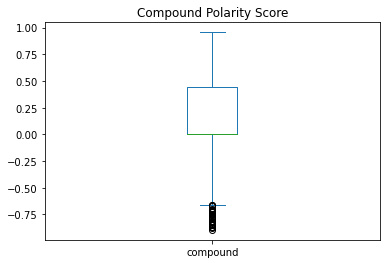

In [35]:
_plot = polarity_pd.reset_index()['compound'].sort_values()
_plot.plot(kind='box')
plt.title('Compound Polarity Score')

plt.savefig('Twitter Polarity Score.png')

Text(0.5, 1.0, 'Sentiment score polarity')

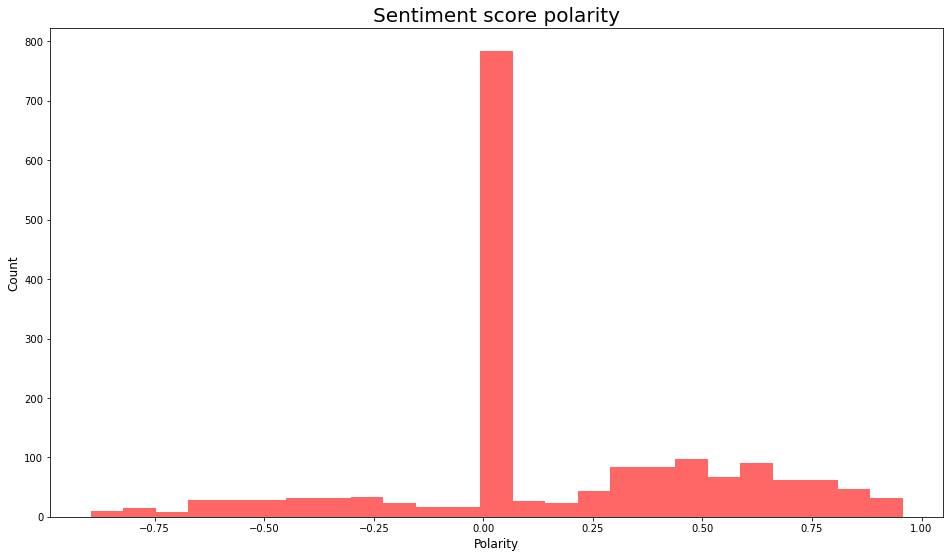

In [36]:
#Create a histogram of polarity for me to read and interpret

num_bins = 25
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(polarity_pd['compound'], num_bins, facecolor='red', alpha=0.6)
# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Sentiment score polarity', fontsize=20)

plt.savefig('Sentiment Score Polarity.png')